In [73]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
os.chdir("D:\datasets")
df = pd.read_csv('Iris.csv')
df_cpy=df.copy()
df_cpy.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [75]:
df_cpy.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [76]:
df_cpy.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [77]:
df_cpy['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [78]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cpy['Species']=le.fit_transform(df_cpy['Species'])
#result-> iris-setosa=0, iris-versicolor=1, iris-virginica=2

In [79]:
df_cpy['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [80]:
del df_cpy['Id']

In [81]:
df_cpy.head(150)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [82]:
df.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [83]:
columns_list=list(df_cpy.columns) #storing col names
print(columns_list)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [84]:
features=list(set(columns_list)-set(['Species'])) #separating output val from data
print(features)

['SepalWidthCm', 'SepalLengthCm', 'PetalWidthCm', 'PetalLengthCm']


In [85]:
X=df_cpy[features].values
y=df_cpy['Species'].values

In [86]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X, y, test_size = 0.2, random_state = 0)

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_X,train_y)
prediction=rf.predict(test_X)
print(prediction)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,prediction)
print(accuracy)

1.0


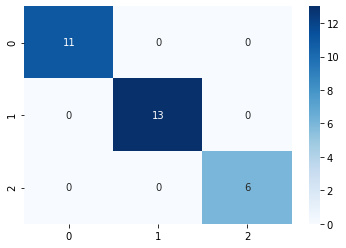

In [89]:
cf_matrix = confusion_matrix(test_y, prediction)
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt="d")

In [90]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb=gnb.fit(train_X,train_y)
prediction1=gnb.predict(test_X)
print(prediction1)

[2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [91]:
accuracy1=accuracy_score(test_y,prediction1)
print(accuracy)

1.0


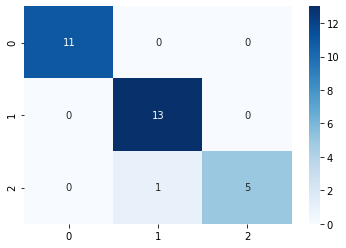

In [92]:
cf_matrix1 = confusion_matrix(test_y, prediction1)
sns.heatmap(cf_matrix1, annot=True, cmap='Blues', fmt="d")

In [95]:
import pickle
filename='iris_model.pkl'
pickle.dump(rf, open(filename,"wb"))